In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
suppressMessages(library(Seurat))
suppressMessages(library(SingleCellExperiment))

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 12)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Setting default number of Parallel threads to 12.



In [3]:
PROJDIR='../../../data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'ArchR_snATAC_DLPFC_glia')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [4]:
 # add clusters for Harmony
if(length(table(proj$ClustersX60)) > 10 ){
proj <- addClusters( proj, reducedDims = 'HarmonyX60', 
                     method = "Seurat", name = 'ClustersX60', algorithm = 2, 
                      maxClusters = 10, filterBias = TRUE,resolution = 1, force = TRUE)}

ArchR logging to : ArchRLogs/ArchR-addClusters-4c5e3c3e412c-Date-2022-01-07_Time-15-56-19.log
If there is an issue, please report to github with logFile!

Overriding previous entry for ClustersX60

2022-01-07 15:56:21 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.014 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 17809
Number of edges: 589582

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8375
Number of communities: 17
Elapsed time: 1 seconds


2022-01-07 15:57:01 : Testing Biased Clusters, 0.677 mins elapsed.

2022-01-07 15:57:01 : Testing Outlier Clusters, 0.682 mins elapsed.

2022-01-07 15:57:01 : Identified more clusters than maxClusters allowed (n = 0). Merging clusters to maxClusters (n = 10).
If this is not desired set maxClusters = NULL!, 0.682 mins elapsed.

2022-01-07 15:57:01 : Assigning Cluster Names to 10 Clusters, 0.683 mins elapsed.

2022-01-07 15:57:01 : Finished addClusters, 0.686 mins elapsed.



In [5]:
proj <- addImputeWeights(proj, reducedDims = "HarmonyX60")

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-4c5e7ee9e9b7-Date-2022-01-07_Time-15-57-01.log
If there is an issue, please report to github with logFile!

2022-01-07 15:57:01 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.



Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4c5e735fab79-Date-2022-01-07_Time-16-25-51.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-01-07 16:25:52 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4c5e735fab79-Date-2022-01-07_Time-16-25-51.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(

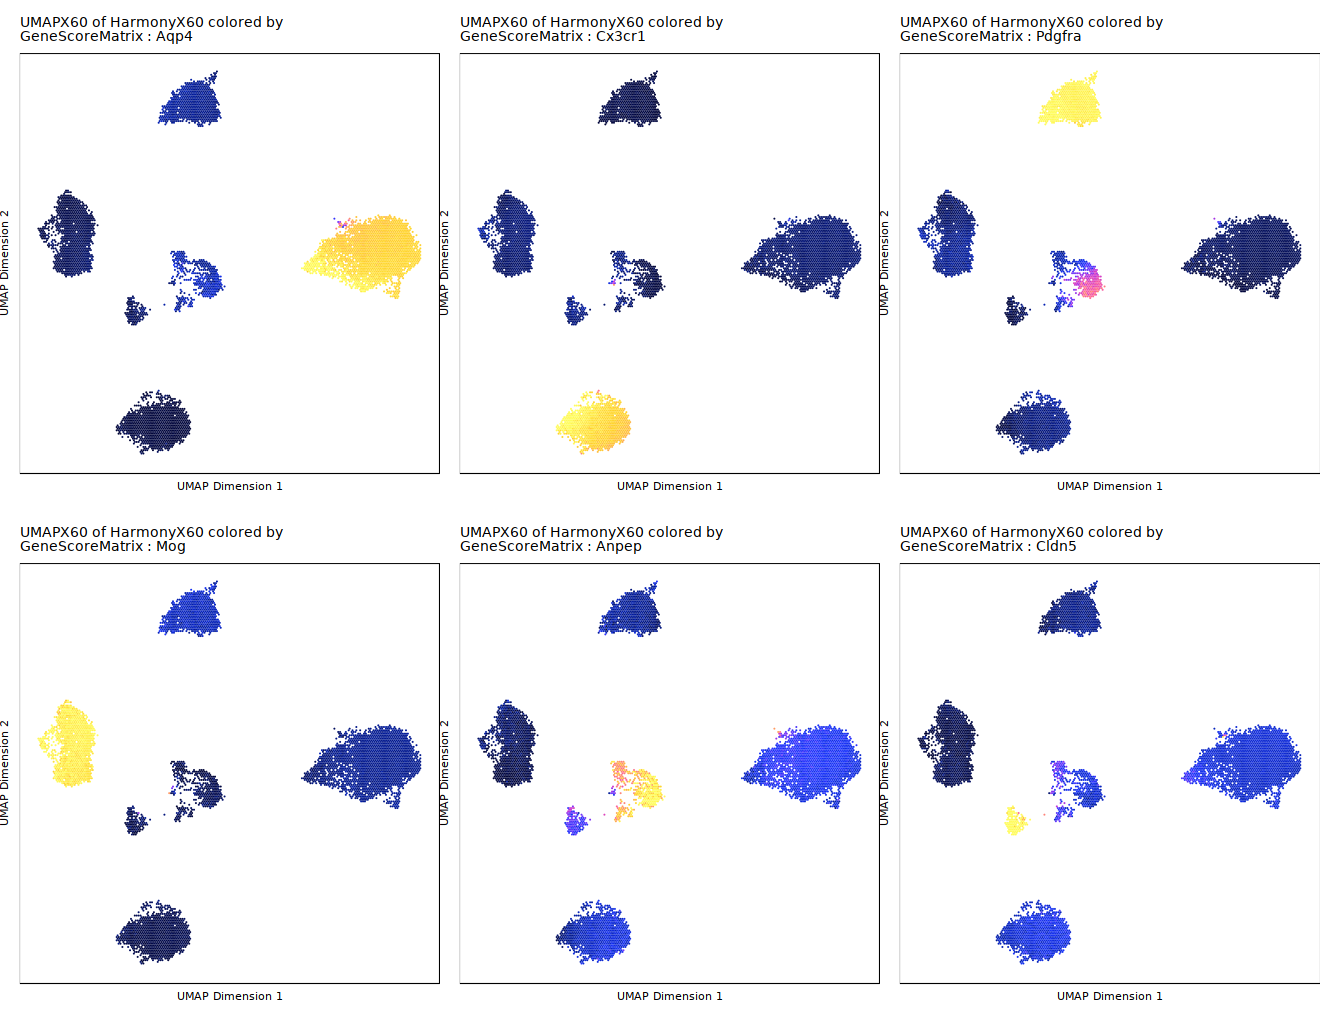

In [15]:
## Neuron vs. Glia markers
markerGenes1  <- c('Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog', #Oligo, 
                   'Anpep', # Mural
                   'Cldn5') # Endothelial
                  

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPX60")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

# Integrate with snRNA-seq from glial cell types

In [6]:
SETDIR='../../../data/tidy_data/rdas/JH_PFC_LabeledNuclei_20220104'
rna_sce = readRDS(file.path(SETDIR,'glia_final.sce.rds'))

In [7]:
head(colData(rna_sce))
logcounts(rna_sce) = NULL

DataFrame with 6 rows and 24 columns
                                      Sample      Region      Animal     Batch
                                 <character> <character> <character> <numeric>
Oskar_DLPFC-6#AAACCCACATGGATCT Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGAAGTGTATTGC Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGAATCCACGTCT Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGCTAGGAAAGTG Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGCTCAGCGACAA Oskar_DLPFC-6       DLPFC    Monkey_O         6
Oskar_DLPFC-6#AAACGCTGTATCCTTT Oskar_DLPFC-6       DLPFC    Monkey_O         6
                               Date.finished.in.Genome.center   Species.name
                                                  <character>    <character>
Oskar_DLPFC-6#AAACCCACATGGATCT                         1/1/19 Rhesus Macaque
Oskar_DLPFC-6#AAACGAAGTGTATTGC                         1/1/19 Rhesus Macaque
Oskar_DLPFC-6#AAACGAATC

In [8]:
###############################################################
# split the cells in snATAC and snRNA by biological replicates
# match the samples from the Multiome samples if possible
groupList <- SimpleList(
Monkey1 = SimpleList(
    ATAC = proj$cellNames[proj$Sample == 'Memphis_DLPFC-1'],
    RNA = colnames(rna_sce)[colData(rna_sce)$Sample == 'Memphis_DLPFC-1']
  ),
Monkey2 = SimpleList(
    ATAC = proj$cellNames[proj$Sample %in% c('London_DLPFC-2')],
    RNA = colnames(rna_sce)[colData(rna_sce)$Sample == c('London_DLPFC-2')]
  ), 
Monkey4 = SimpleList(
    ATAC = proj$cellNames[proj$Sample == 'Nairobi_DLPFC-4'],
    RNA = colnames(rna_sce)[colData(rna_sce)$Sample == 'Nairobi_DLPFC-4']
  ),
Monkey5 = SimpleList(
    ATAC = proj$cellNames[proj$Sample == 'Nairobi_DLPFC-5'],
    RNA = colnames(rna_sce)[colData(rna_sce)$Sample == 'Nairobi_DLPFC-5']
  ),
# this sample missing multiomeRNA profiles, match w/ a different monkey
Monkey3 = SimpleList(
    ATAC = proj$cellNames[proj$Sample == 'Memphis_DLPFC-3'],
    RNA = colnames(rna_sce)[colData(rna_sce)$Sample == 'Oskar_DLPFC-6']
  ))

In [9]:
#####################################
# integration split by tissue region
proj <- addGeneIntegrationMatrix(
    ArchRProj = proj,
    useMatrix = "GeneScoreMatrix",
    matrixName = "GeneIntegrationMatrix",
    reducedDims = "HarmonyX60",
    seRNA = rna_sce,  nGenes = 2000, 
    addToArrow = FALSE, plotUMAP = FALSE,
    groupList = groupList,
    groupRNA = "cell_class",
    nameCell = "predictedCell_RNA2ATACCo",
    nameGroup = "predictedGroup_RNA2ATACCo",
    nameScore = "predictedScore_RNA2ATACCo"
)

ArchR logging to : ArchRLogs/ArchR-addGeneIntegrationMatrix-4c5e436a8756-Date-2022-01-07_Time-15-57-58.log
If there is an issue, please report to github with logFile!

2022-01-07 15:57:58 : Running Seurat's Integration Stuart* et al 2019, 0.004 mins elapsed.

2022-01-07 15:57:59 : Checking ATAC Input, 0.012 mins elapsed.

2022-01-07 15:57:59 : Checking RNA Input, 0.013 mins elapsed.

2022-01-07 15:58:24 : Found 18187 overlapping gene names from gene scores and rna matrix!, 0.432 mins elapsed.

2022-01-07 15:58:24 : Creating Integration Blocks, 0.432 mins elapsed.

2022-01-07 15:58:24 : Prepping Interation Data, 0.433 mins elapsed.

2022-01-07 15:58:26 : Computing Integration in 5 Integration Blocks!, 0 mins elapsed.

2022-01-07 16:06:26 : Completed Integration with RNA Matrix, 8.007 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-addGeneIntegrationMatrix-4c5e436a8756-Date-2022-01-07_Time-15-57-58.log



# Compare snATAC clusters w/ snRNA clusters

In [13]:
############################################
# using marker gene scores, give cluster names
remapClust <- c(
  'C1'='Drop',
  'C2'='Astro',
  'C3'='Drop',
  'C4'='Oligo',
  'C5'='OPC',
  'C6'='Microglia',
  'C7'='Endo', 
  'C8'='Mural',
  'C9'='Mural',
  'C10'='Mural'
)

proj$Celltype1 <- mapLabels(proj$ClustersX60, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Celltype1)


    Astro      Drop      Endo Microglia     Mural     Oligo       OPC 
     7326       144       270      3601      1010      3024      2434 

preClust,
Astro,Astro
Endo,Mural
Endo,Endo
Oligo,Oligo
OPC,OPC
Microglia,Microglia
Astro,Drop


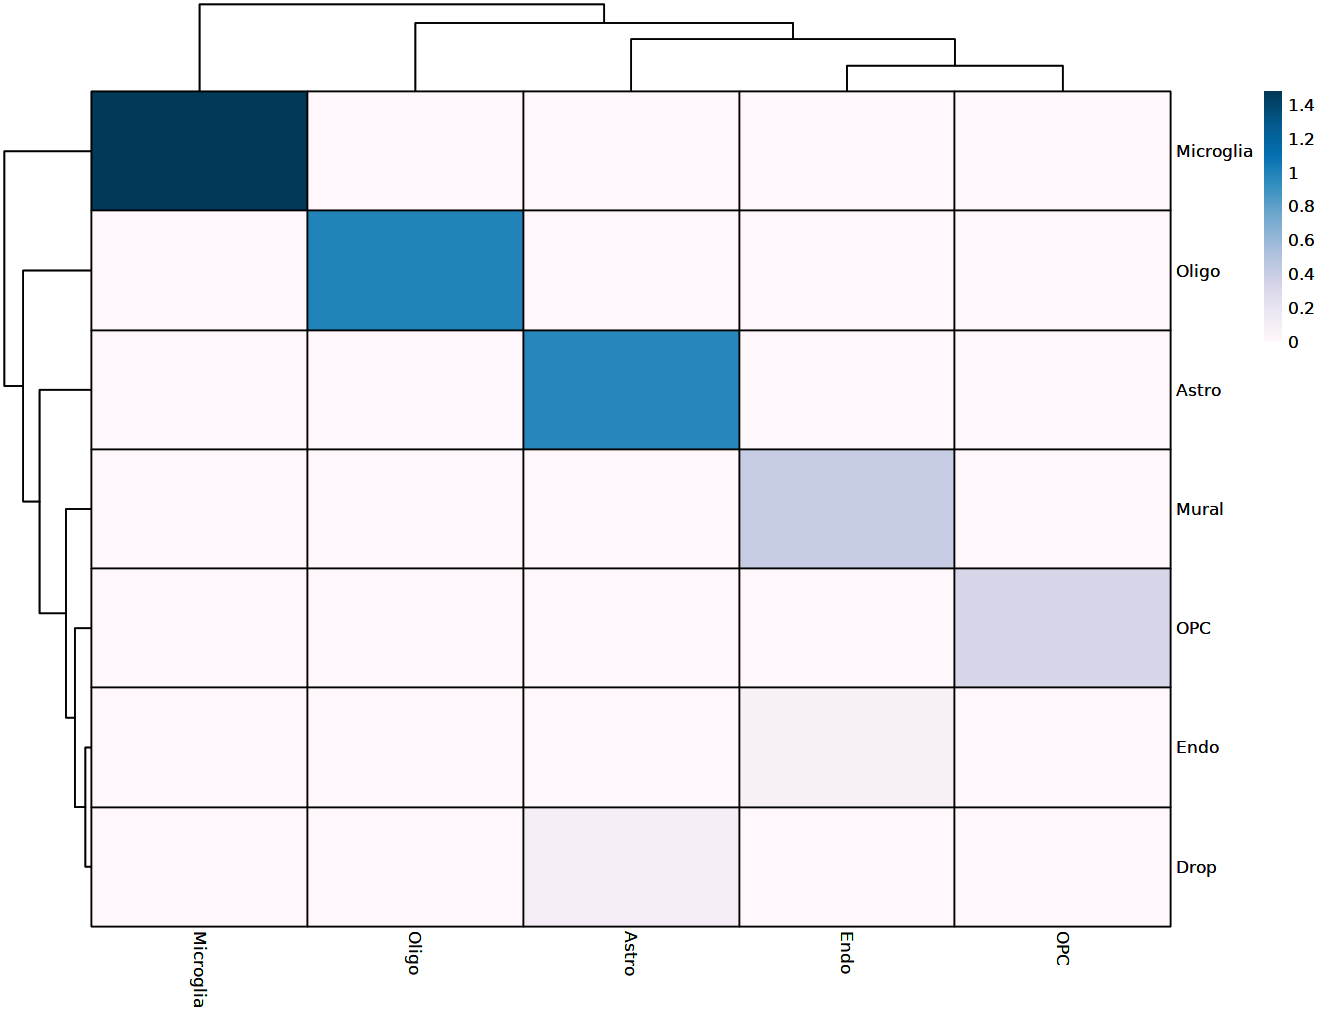

In [14]:
# plot the confusion matrix of cell types by predicted cell type clusters
cM <- confusionMatrix(paste0(proj$Celltype1), paste0(proj$predictedGroup_RNA2ATACCo))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

preClust <- colnames(cM)[apply(cM, 1 , which.max)]
cbind(preClust, rownames(cM)) #Assignments

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4c5e2c40e4dd-Date-2022-01-07_Time-16-26-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4c5e2c40e4dd-Date-2022-01-07_Time-16-26-34.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4c5e3e2782d3-Date-2022-01-07_Time-16-26-35.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4c5e3e2782d3-Date-2022-01-07_Time-16-26-35.log



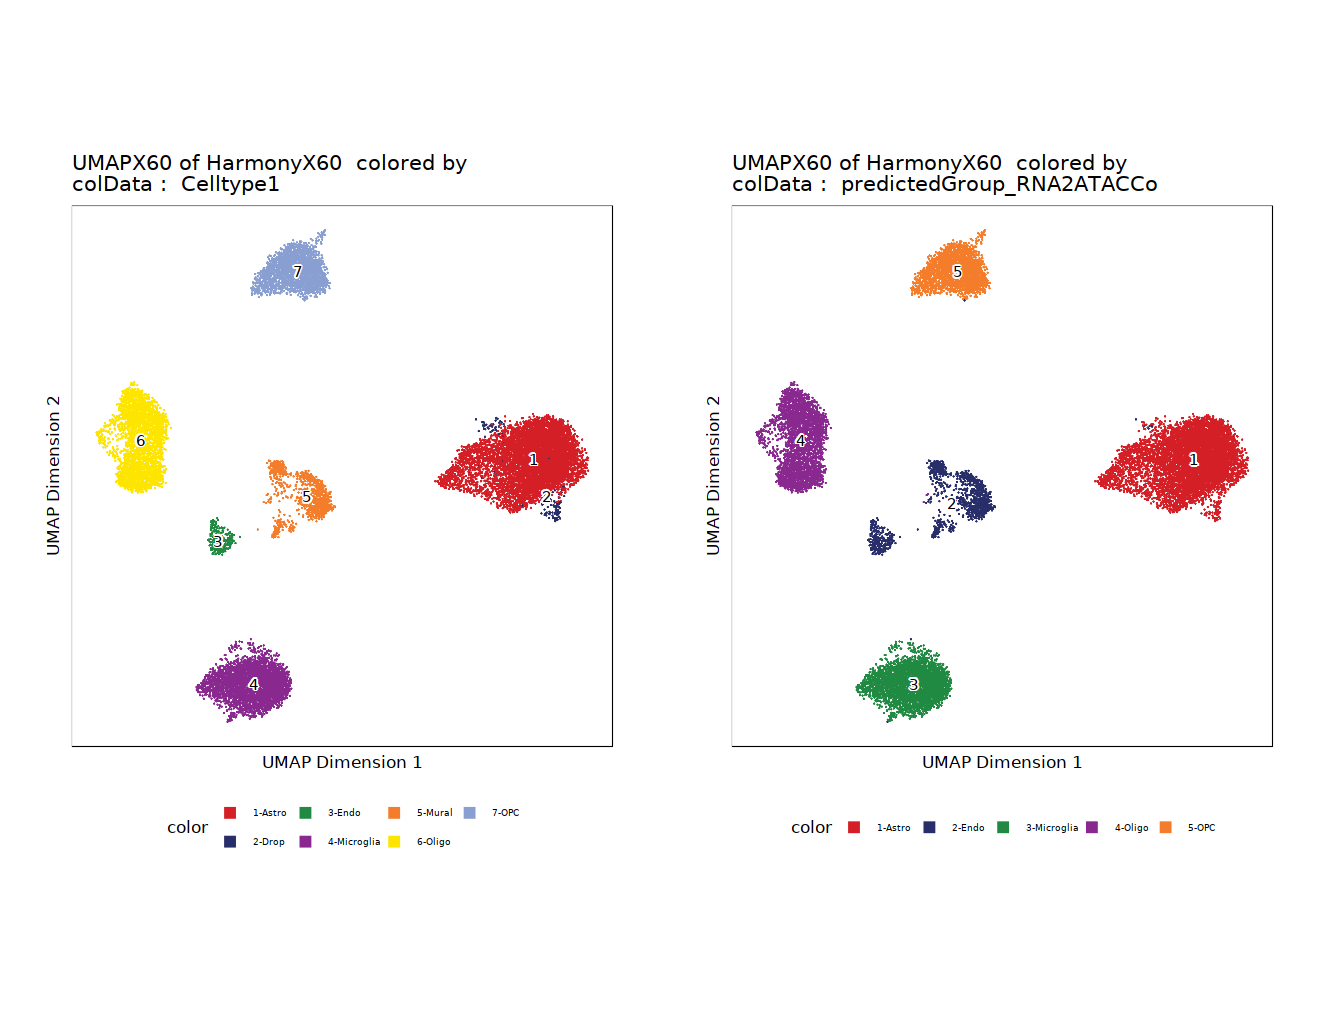

In [17]:
indDrop = which(proj$predictedScore_RNA2ATACCo < 0.5 )
proj$predictedGroup_RNA2ATACCo[indDrop] = 'Drop'

p2 <- plotEmbedding( proj, colorBy = "cellColData", name = "predictedGroup_RNA2ATACCo", embedding = "UMAPX60")
p3 <- plotEmbedding( proj, colorBy = "cellColData", name = "Celltype1", embedding = "UMAPX60")

ggAlignPlots(p3, p2, type = "h")

In [18]:
# drop the UNK cluster
idxSample <- BiocGenerics::which(proj$Celltype1 %ni% c('Drop'))
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]
proj = subsetCells(ArchRProj = proj, cellNames = cellsSample)
proj = saveArchRProject(ArchRProj = proj)


    Astro      Endo Microglia     Mural     Oligo       OPC 
     7326       270      3601      1010      3024      2434 

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         